In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from numbers import Number
from scipy import stats
import math

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

* dependent variable is response time.
* independent variable is word, congruent or incongruent

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null Hypothesis: ( μi - μc = 0 ) There is no significant difference in the population average response time in viewing the congruent(c) words vs viewing the incongruent(i) words.

Alternative Hypothesis: ( μi - μc ≠ 0 ) There is a significant difference, positive or negative, in the population average response times.The population means for response times for the two conditions, congruent and incongruent, are not the same.

The t-test compares two averages (means) and tells how they are different from each other. And it can provide how significant mean differences are. Therefore performing t-test is suitable for that two proportion case. 

Here, Paired T test is used because it can determine whether the mean of the differences between two paired samples differs from 0 or target value. Null Hypothesis is based on this definition.
The paired t-test calculates the difference within each before-and-after pair of measurements, determines the mean of these changes, and reports whether this mean of the differences is statistically significant.

The accuracy of the dependent measures t-test is predecated upon the assumption that the differences between the results for the two conditions for each of subjects is normally distributed adn sampling is random and pairs of observations are independent.

Since population parameters are not known, z-test cannot be used properly.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [4]:
count = df.count()
print( "The number of results for each condition: \n{}".format(count))
median = df.median()
print ("The median result for each condition: \n{}" .format(median))
mean = df.mean()
print ("The mean of the results for each condition: \n{}" .format(mean))
stand_dev = df.std()
print ("The standard deviation of the results for each condition: \n{}".format(stand_dev))

The number of results for each condition: 
Congruent      24
Incongruent    24
dtype: int64
The median result for each condition: 
Congruent      14.3565
Incongruent    21.0175
dtype: float64
The mean of the results for each condition: 
Congruent      14.051125
Incongruent    22.015917
dtype: float64
The standard deviation of the results for each condition: 
Congruent      3.559358
Incongruent    4.797057
dtype: float64


I have performed basic statistical operations here. As it can be seen from the results that, standard deviation and mean are higher for Incongruent case. In the next step, it can be seen graphically.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

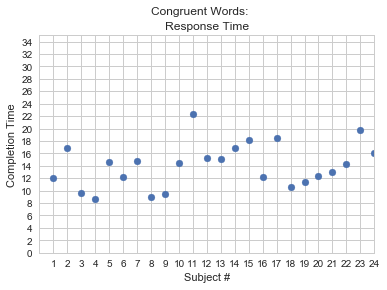

In [10]:
# Build the visualizations here
df['Subject'] = df.index+1

N = len(df)
x = df['Subject']
y = df['Congruent']
colors = 'blue'
area = np.pi * 15 # 0 to 15 point radiuses
fig = plt.figure()
fig.suptitle('Congruent Words: ', fontsize=12)
ax = fig.add_subplot(111)
ax.set_title('Response Time')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time')
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 35, 2))
plt.scatter(x, y, s=area)
plt.ylim([0,35])
plt.xlim([0,24])
plt.show()

--write answer here--

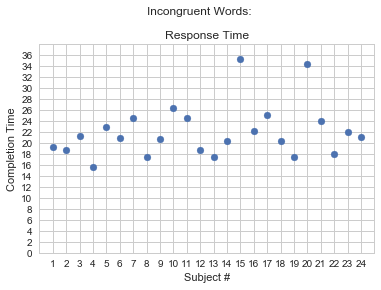

In [11]:
N = len(df)
x = df['Subject']
y = df['Incongruent']
colors = 'red'
area = np.pi * 15 # 0 to 15 point radiuses

fig = plt.figure()
fig.suptitle('Incongruent Words: ', fontsize=12)
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Response Time')
ax.set_xlabel('Subject #')
ax.set_ylabel('Completion Time')

plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.yticks(np.arange(0, 38, 2))
plt.scatter(x, y, s=area)
plt.ylim([0,38])
plt.xlim([0,25])
plt.show()

In [12]:
c_mean = df['Congruent'].mean()
c_mean

14.051125000000004

In [13]:
i_mean = df['Incongruent'].mean()
i_mean

22.01591666666667

I have performed scatter plot analysis to see response time of participants to Incongruent and Congruent case. Mean of time can be seen both mathematically and graphically. In Incongruent case, it is observed that there are outliers around 35. These outliers can be investigated.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [14]:
#number of subjects in the sample
n = len(df)
print( "Number of subjects/participant is: {}" .format(n))

Number of subjects/participant is: 24


In [15]:
#point estimate of μi - μc -> PE (in seconds)
PE = i_mean - c_mean
PE = round(PE,2)
print( "Point Estimate is: {}" .format(PE))

Point Estimate is: 7.96


Here, t-critical and t-statistic should be calculated;

t-critical value can be calculated from provided t-table;

Since n is found as 24 and an alpha level of 0.025 is using because this is a two tail/proportion test.
t-critical is based on this alpha level,0.025, and a df-1 of 24. Then it is found as;

t-critical = 2.069

And Confidence Level for alpha 0.025 is 95%

The confidence interval for a t-critical value of 2.069 is: (-10.019367912, -5.91021542131)
From this, we can conclude with a 95% degree of confidence that the population mean for the time it takes to complete the Incongruent Stroop Task is at least 5.9102 seconds longer than that for the Congruent Stroop Task.

In order to find t-statistical, sample standard deviation of differences should be calculated. 

In [16]:
# First, new column "dif" is created in df.
df['dif'] = df['Incongruent'] - df['Congruent']
df['dif'].head()

0     7.199
1     1.950
2    11.650
3     7.057
4     8.134
Name: dif, dtype: float64

In [17]:
# Then sum of squared differences should be calculated.
# Calculate difference of each entry from the mean and then squared them and sum.
df['D_diff'] = df['dif'] - df['dif'].mean()
df['Squared'] = df['D_diff'] * df['D_diff']

SumOfSquared = df['Squared'].sum()

#Calculate variance

v = SumOfSquared/(n-1)

print('Variance of sum of squared difference is {}'. format(v))

s = np.sqrt(v)
v_sum = round(s,2)

print('sample standard deviation of differences is {}'. format(v_sum))

t = PE/(s/(np.sqrt(n)))
t_s = round(t,4)

print('t-statistics is {}'. format(t_s))

Variance of sum of squared difference is 23.666540867753632
sample standard deviation of differences is 4.86
t-statistics is 8.0159


t-statistic > t-critical

In particular, Null Hypothesis which states that there is no significant differences between the population average completion time for Congruent and Incongruent should be rejected. Because point estimate is 7.96


(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--